<div align=center>

# Deep Learning Assignment

By Hamed Araab

Supervisor: Dr. Marzieh Zarinbal

</div>


### Notebook Setup


In [1]:
# DO NOT EDIT THIS CELL.
# DO NOT IMPORT ANY OTHER ENTITIES INTO THE NOTEBOOK.
# DO NOT USE ANY KERAS ENTITIES OTHER THAN THE IMPORTED ONES.

import matplotlib.pyplot as plt
import tensorflow.keras as keras

# For data loading and preprocessing
from keras.datasets import cifar10
from keras.utils import to_categorical

# For model creation
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, MaxPooling2D, Conv2D
from keras.activations import sigmoid, relu, softmax
from keras.optimizers import SGD, Adam
from keras.losses import categorical_crossentropy
from keras.metrics import CategoricalAccuracy

# For model evaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Loading the CIFAR-10 Dataset


In [2]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

labels = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

170498071/170498071 [==============================] - 17s 0us/step


((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

### Data Preprocessing


In [3]:
X_train = X_train.reshape(50000, 32, 32, 3) /255  # Preprocess X_train
X_test = X_test.reshape(10000, 32, 32, 3) /255 # Preprocess X_test

Y_train = to_categorical(Y_train) # Preprocess Y_train
Y_test = to_categorical(Y_test) # Preprocess Y_test

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((50000, 32, 32, 3), (50000, 10), (10000, 32, 32, 3), (10000, 10))

### Data Visualization


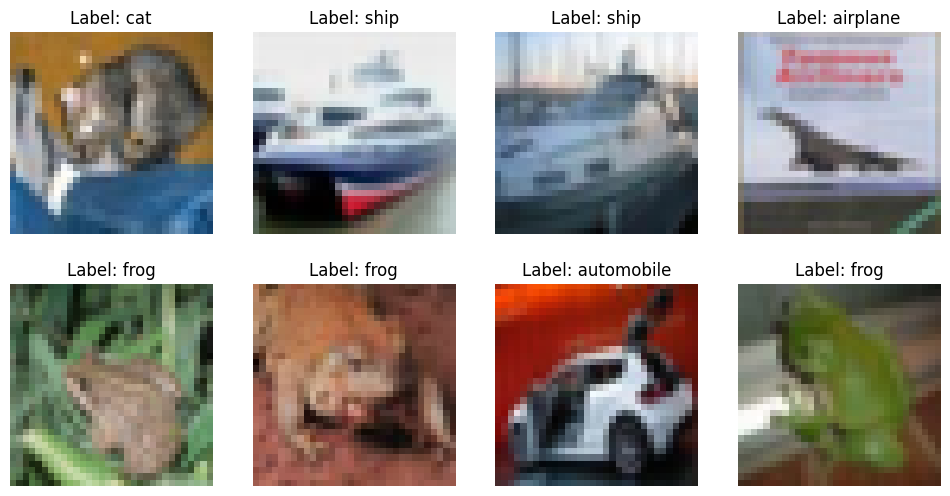

In [4]:
sample_images = X_test[:8, :, :, :]
sample_labels = Y_test[:8, :]

plt.figure(figsize=(12, 6))

for i in range(sample_images.shape[0]):
    plt.subplot(2, 4, i + 1)
    plt.imshow(sample_images[i, :, :, :])
    plt.title(f"Label: {labels[sample_labels[i, :].argmax()]}")
    plt.axis("off")

plt.show()

### Creating & Training the DNN Model





In [5]:
model = Sequential()

# ADD THE LAYERS
# AVAILABLE LAYERS: Input, Conv2D, MaxPooling2D, Flatten, Dense
# AVAILABLE ACTIVATION FUNCTIONS: Sigmoid, ReLU, Softmax
model.add(Input(shape=(32, 32, 3)))

model.add(Conv2D(15, kernel_size=(3,3), strides=(1,1), padding='same', activation='ReLU'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))

model.add(Conv2D(60, kernel_size=(3,3), strides=(1,1), padding='same', activation='ReLU'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))

model.add(Conv2D(100, kernel_size=(3,3), strides=(1,1), padding='same', activation='ReLU'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))




# flatten output of conv
model.add(Flatten())

# output layer
model.add(Dense(10, activation='softmax'))


model.compile(
    loss=categorical_crossentropy, # SET THE LOSS FUNCTION (CCE, BCE, MSE)
    optimizer='adam', # SET THE OPTIMIZER (Adam, SGD)
    metrics=['accuracy'],
)

model.summary()
model.fit(
    X_train,
    Y_train,
    epochs=4, # SET THE NUMBER OF EPOCHS
    batch_size=10, # SET THE BATCH SIZE
    validation_data=(X_test, Y_test),
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 15)        420       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 15)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 60)        8160      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 60)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 100)         54100     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 100)         0

### Model Evaluation

In [6]:
model.get_metrics_result()

{'loss': <tf.Tensor: shape=(), dtype=float32, numpy=0.8618874>,
 'accuracy': <tf.Tensor: shape=(), dtype=float32, numpy=0.701>}

313/313 [==============================] - 7s 21ms/step


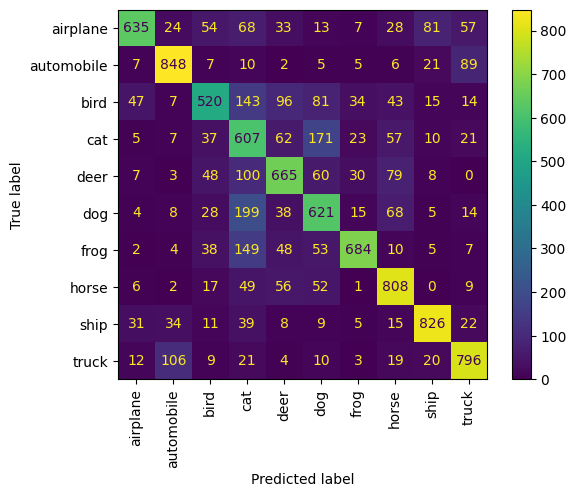

In [7]:
Y_hat_test = model.predict(X_test)

ConfusionMatrixDisplay(
    confusion_matrix(
        Y_test.argmax(axis=1, keepdims=True),
        Y_hat_test.argmax(axis=1, keepdims=True),
    ),
    display_labels=labels,
).plot(xticks_rotation="vertical")